<center>
<h1 style="color:red; font-size:70px;"> Esercitazione 3</h1>

In questo notebook sono riportati gli esercizi per la cui soluzione è necessario il codice **md.3**: i grafici qui presenti sono in python, ma nella cartella è possibile trovarne di analoghi fatti con gnuplot. Sono anche riportati i comandi per creare i plot, salvati in dei file '.gnuplot'. 

Per eseguire il notebook sui computer di laboratorio, è necessario lanciare il seguente comando e selezionare un kernel python.

<center>

`module load python3/anaconda`
<center>

In [7]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.cm import ScalarMappable

from scipy.stats import norm
from scipy.optimize import curve_fit

<center>

## Calcolo della temperatura

E' possibile misurare la temperatura di un sistema senza chiamare in causa l'equipartizione, ma basandosi sulla definizione di temperatura in termini entropici. In particolare possiamo definire una sotto-regione A della sezione dello spazio delle fasi a cui siamo interessati (ossia quella ad energia fissata E) e valutare quale sia il tempo di ritorno medio di una traiettoria che ha punto di partenza in A. Tale quantità può essere ottenuta mediando su tutti i punti d'inizio possibili, in modo tale da avere che

$$
\overline{\tau_A}\left(E\right)\,=\,\frac{1}{\Omega\left(A\right)}\int_{a \in A} \tau_A\left(a\right) da.
$$

Notiamo che il tempo di ricorsione medio presenta una dipendenza sull'energia E, dato che le traiettorie nello spazio delle fasi sono confinate alla regione ad energia E. Per ottenere una stima della temperatura è necessario lavorare con due energie differenti, in modo tale che sia possibile valutare la differenza in entropia dei due sistemi come

$$
S\left(E_2\right)\,-\,S\left(E_1\right)\,=\,\log{\frac{\Omega\left(E_2\right)}{\Omega\left(E_1\right)}}\,=\,\log{\frac{\overline{\tau_{A_1}}\left(E_1\right)}{\overline{\tau_{A_2}}\left(E_2\right)}}.
$$

La differenza riportata in precedenza è stata espressa in funzione dei tempi di ricorsione medi grazie al teorema di Kac, che lega tali quantità al volume occupato nello spazio delle fasi dalla regione A. In particolare si ha che

$$
\overline{\tau_{A}}\left(E\right)\,=\,\tau_0\frac{\Omega\left(E\right)}{\Omega\left(A\right)}
$$

La temperatura può essere ora determinata come 

$$
T\,=\,\frac{E_2\,-\,E_1}{k_B \left[\log{\overline{\tau}\left(E_2\right)} - \log{\overline{\tau}\left(E_1\right)}\right]}
$$

Una delle possibili problematiche di questo metodo è che la fase di transiente, presente nel momento in cui il sistema iniziale si trova lontano dall'equilibrio, non deve essere inclusa nella media. Notiamo tuttavia che nel caso del nostro sistema la fase di equilibrazione è molto rapida.

<center>
<h1 style="color:blue; font-size:50px;"> Esercizio 1.9</h1>

L'obiettivo di questo esercizio è la determinazione della temperatura di una catena costituita da 12 masse, collegate fra loro con delle molle, mediante il metodo indiretto basato su considerazioni entropiche esposto in precedenza. Per determinare i tempi di ricorsione medi studiamo il numero di ritorni nella sotto-regione A, facendo particolare attenzione al tempo in cui essi avvengono. Il coefficiente angolare di un fit lineare in cui sulle ascisse poniamo il numero di eventi e sulle ordinate quando essi si verificano è proprio il tempo di ricorsione medio $\tau$. Lavorando con due energie differenti, è possibile calcolare la temperatura. 

La temperatura della catena, valutata con considerazioni entropiche, è pari a 4.65 K


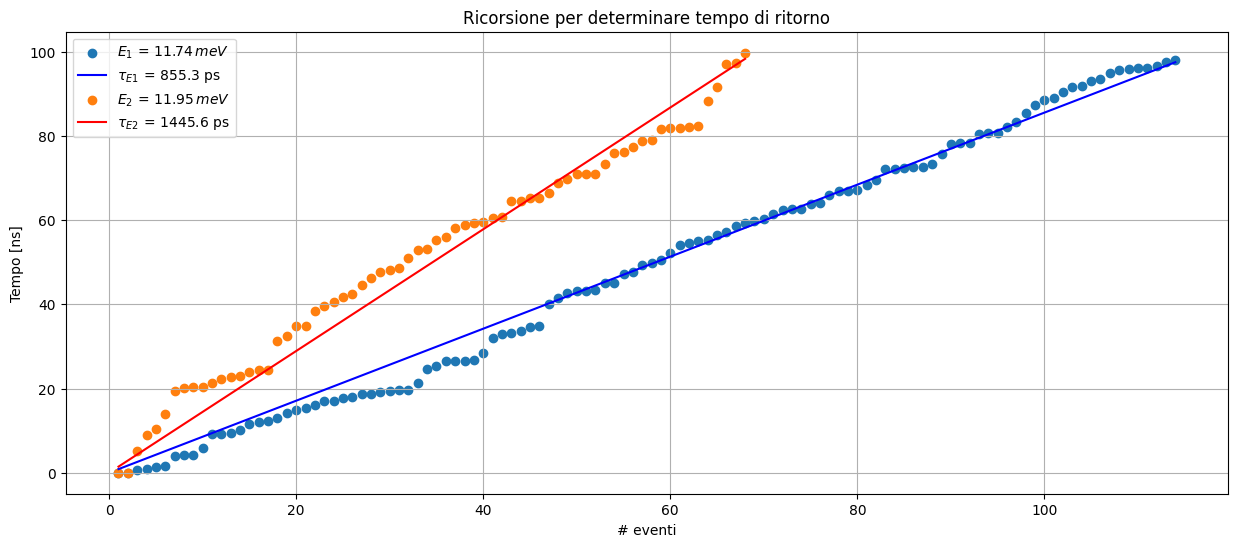

In [8]:
fig = plt.figure(figsize = (15, 6))

def linear_model(x, m):
    return m * x

#--------------------------------#
#       Energia: 11.74 meV       #
#--------------------------------#
y = np.loadtxt('recTemp/recursion1.dat')
x = np.linspace(1, len(y), len(y))

params, covariance = curve_fit(linear_model, x, y)
m1 = params[0]
y_fit = m1 * x

plt.scatter(x, y/1000, label=r"$E_{1}\,=\,11.74\,meV$")
plt.plot(x, y_fit/1000, color="blue", label = r'$\tau_{E1}\,=\,$' + str(round(m1, 1)) + ' ps')


#--------------------------------#
#       Energia: 11.95 meV       #
#--------------------------------#
y = np.loadtxt('recTemp/recursion2.dat')
x = np.linspace(1, len(y), len(y))

params, covariance = curve_fit(linear_model, x, y) 
m2 = params[0]
y_fit = m2 * x

plt.scatter(x, y/1000, label=r"$E_{2}\,=\,11.95\,meV$")
plt.plot(x, y_fit/1000, color="red", label = r'$\tau_{E2}\,=\,$' + str(round(m2, 1)) + ' ps')

#---------------------------------#
#       Temperatura sistema       #
#---------------------------------#
E1 = 11.74
E2 = 11.95
kB = 0.086

T = (E2 - E1)/(kB * np.log(m2/m1))
print('La temperatura della catena, valutata con considerazioni entropiche, è pari a ' + str(round(T, 2)) + ' K')


plt.title("Ricorsione per determinare tempo di ritorno")
plt.xlabel("# eventi")
plt.ylabel("Tempo [ns]")
plt.legend(loc = 'best')
plt.grid()
plt.show()

<center>
<h1 style="color:blue; font-size:50px;"> Esercizio 1.10</h1>

In primo luogo ci assicuriamo del fatto che il transiente è trascurabile rispetto alla durata della simulazione, andando a graficare l'energia cinetica del sistema in funzione del tempo d'evoluzione.

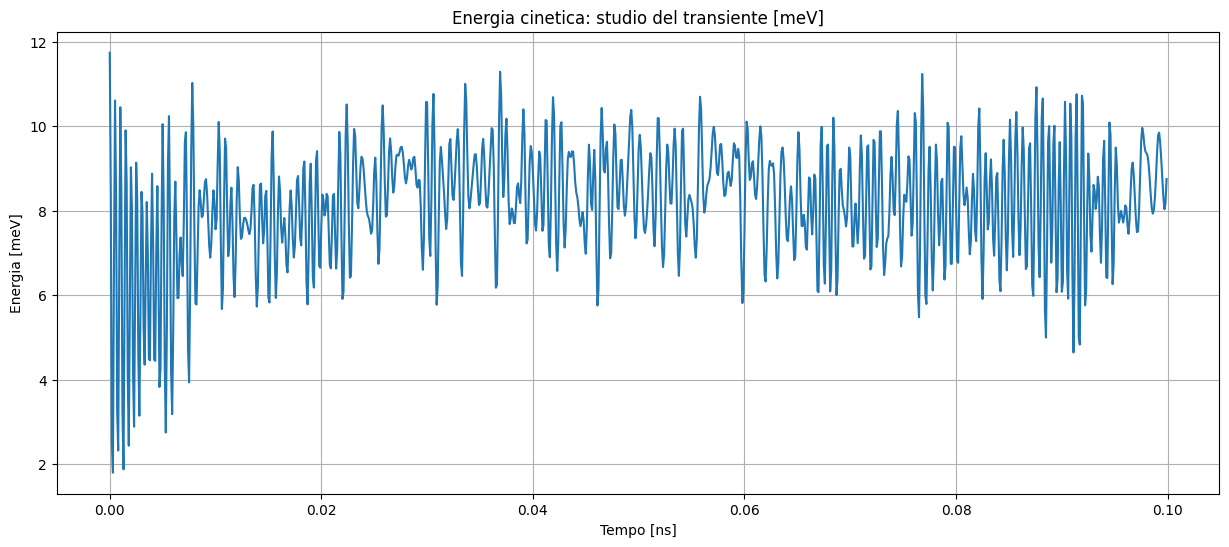

In [11]:
fig = plt.figure(figsize = (15, 6))

appo = np.loadtxt('confTemp/transient.dat')
plt.plot(appo[0:1000, 0]/1000, appo[0:1000, 1])

plt.title("Energia cinetica: studio del transiente [meV]")
plt.xlabel("Tempo [ns]")
plt.ylabel("Energia [meV]")
plt.grid()
plt.show()

Dato che la stabilizzazione è praticamente istantanea, procediamo con il calcolo della temperatura utilizzando l'equipartizione. Dato che la catena è tridimensionale, il numero di gradi di libertà è pari a tre. La temperatura è quindi data da

$$
T\,=\,\frac{2E_{kin}}{ 3 N k_B}
$$

La temperatura media della catena, calcolata con l'equipartizione, è pari a: 5.6 K


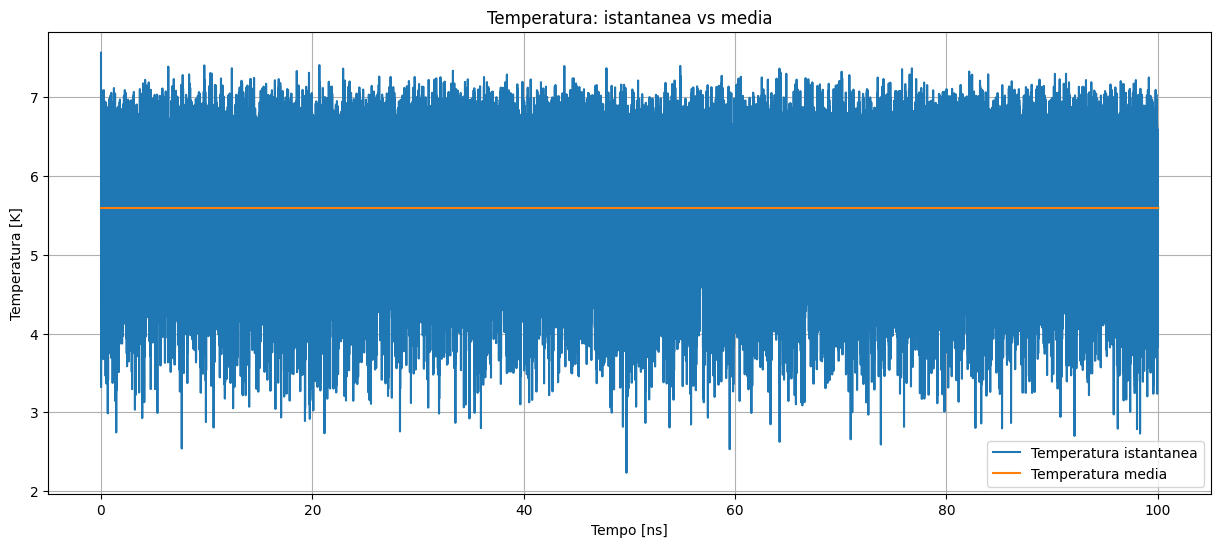

In [10]:
fig = plt.figure(figsize = (15, 6))

N = 12
kB = 0.0862
teQ = np.loadtxt('confTemp/tempEqui.dat')

Tmed = 2 * np.mean(teQ[:, 1])/(3 * N * kB)
print("La temperatura media della catena, calcolata con l'equipartizione, è pari a: " + str(round(Tmed, 2)) + ' K')

plt.plot(teQ[:, 0]/1000, teQ[:, 1] * 2/(3 * N * kB), label = 'Temperatura istantanea')
plt.plot(np.array([teQ[0, 0]/1000, teQ[-1, 0]/1000]), np.array([Tmed, Tmed]), label = 'Temperatura media')

plt.title("Temperatura: istantanea vs media")
plt.xlabel("Tempo [ns]")
plt.ylabel("Temperatura [K]")
plt.legend(loc = 'best')
plt.grid()
plt.show()